# Análisis Bivariado

## Descripción
En esta sección vamos a realizar un análisis bivariado para explorar las relaciones entre dos variables diferentes. Este análisis nos permitirá identificar patrones, correlaciones y dependencias entre distintas características del dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/processed/SuperStore_limpio.csv')

df.head(4)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_Code,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


# Análisis Bivariado: Category vs Segment

## Descripción
En esta sección vamos a analizar la relación entre la **Categogy** y el **Segment**. Este análisis cruzado nos permitirá entender las preferencias de compra de cada segmento y optimizar las estrategias comerciales.

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,1113,646,362
Office Supplies,3127,1820,1079
Technology,951,554,342


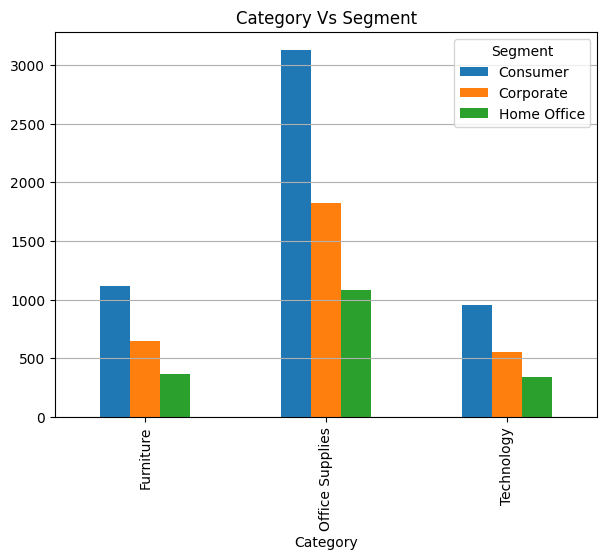

In [3]:
df_tc = pd.crosstab(df['Category'],df['Segment'])


df_tc.plot(kind='bar', stacked=False, figsize=(7,5))
plt.title('Category Vs Segment')
plt.grid(axis='y')
df_tc

## Descripcion
El segmento Consumer concentra la mayor participación de ventas en todas las categorías, lo que refuerza su relevancia estratégica. Sin embargo, existe espacio de crecimiento en Corporate y Home Office, especialmente en categorías como Office Supplies, donde la brecha es menor.

## Descripción
En esta sección vamos a analizar la relación entre las **Category** y las **Sales**. Este análisis nos permitirá identificar qué categorías generan mayores ingresos y comprender el comportamiento de ventas por tipo de producto.

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

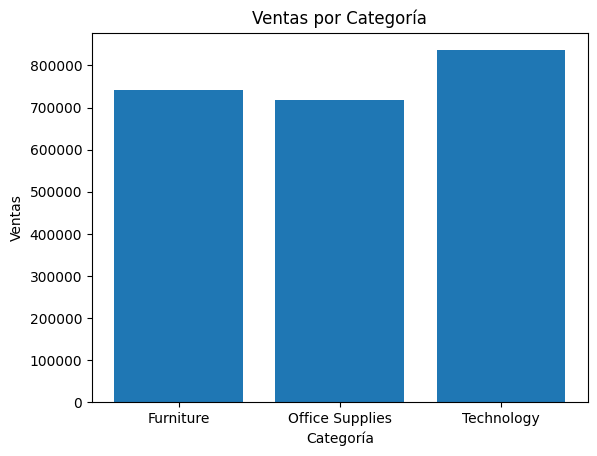

In [4]:
df_SalesCategory = df.groupby('Category')['Sales'].sum()

plt.bar(df_SalesCategory.index, df_SalesCategory.values)
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')

df_SalesCategory

Product_Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64

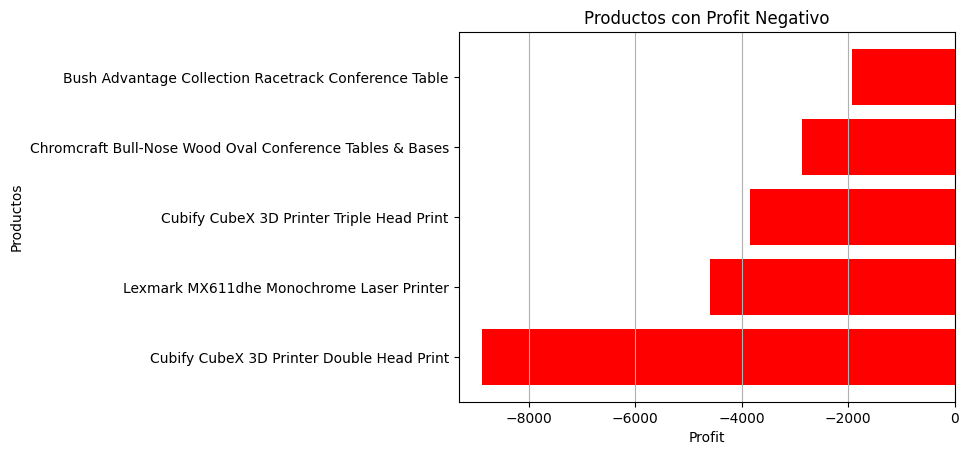

In [23]:
df_product = df.groupby('Product_Name')['Profit'].sum().sort_values().head()

plt.barh(df_product.index, df_product.values, color=['red' if x < 0 else 'green' for x in df_product.values])
plt.grid(axis='x')
plt.title('Productos con Profit Negativo')
plt.ylabel('Productos')
plt.xlabel('Profit')
df_product

Aunque algunos productos tienen buenas ventas, presentan pérdidas significativas en el margen de ganancia. Esto podría indicar una estrategia de precios ineficiente o descuentos excesivos en ciertas categorías

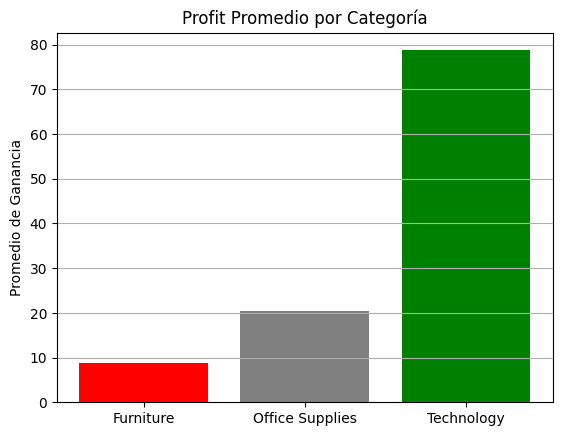

In [ ]:
df_ProfitCategory = df.groupby('Category')['Profit'].mean()

colors = ['red' if x == df_ProfitCategory.min() else 'green' if x == df_ProfitCategory.max() else 'gray' for x in df_ProfitCategory.values]

plt.bar(df_ProfitCategory.index, df_ProfitCategory.values, color=colors)
plt.title('Profit Promedio por Categoría')
plt.ylabel('Promedio de Ganancia')
plt.grid(axis='y')

En promedio, los productos tecnológicos generan la mayor utilidad por venta, con un margen casi cuatro veces superior al de Office Supplies y nueve veces al de Furniture.
Esto sugiere que la categoría Technology impulsa la rentabilidad general del negocio, mientras que Furniture podría requerir una revisión de precios o costos.

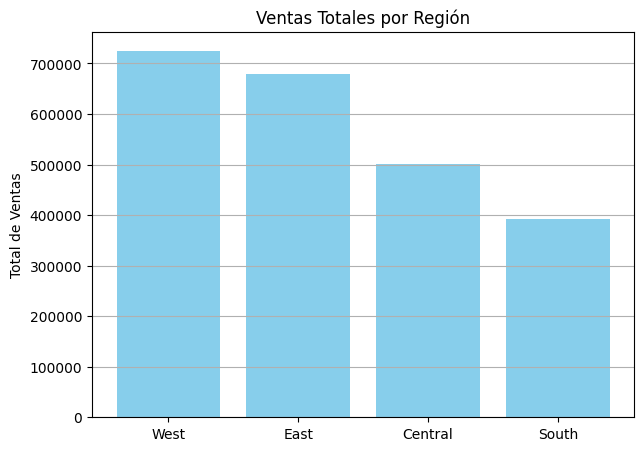

In [ ]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(sales_region.index, sales_region.values, color='skyblue')
ax.set_title('Ventas Totales por Región')
ax.set_ylabel('Total de Ventas')
ax.grid(axis='y')
plt.show()

La región West concentra la mayor parte de las ventas, seguida de East, lo que sugiere que la estrategia comercial en el oeste es más efectiva o tiene un mercado más fuerte.

In [ ]:
df['Product_Name']